In [ ]:
#import all the necessary packages
import numpy as np #for numerical array data
import pandas as pd #for tabular data
import matplotlib.pyplot as plt #for plotting purposes

%matplotlib inline
plt.rcParams['axes.labelsize'] = 14
plt.rcParams['xtick.labelsize'] = 12
plt.rcParams['ytick.labelsize'] = 12

import importlib as imp
import warnings
warnings.filterwarnings('ignore')

In [ ]:
all_data = pd.read_csv("Data_Oct2018.csv")
#all_data['Date'] = pd.to_datetime(all_data['Date'])

In [ ]:
all_data.head(20)

Date  World Equities  ...  Commodities  Corp Bonds
0    1/1/1985        0.028511  ...     0.021351    0.048963
1    2/1/1985       -0.009204  ...    -0.015217   -0.042029
2    3/1/1985        0.075134  ...     0.037171    0.032666
3    4/1/1985       -0.002459  ...    -0.035116    0.037125
4    5/1/1985        0.040245  ...     0.004351    0.104199
5    6/1/1985        0.022419  ...    -0.046275    0.012482
6    7/1/1985        0.048480  ...    -0.006240   -0.006449
7    8/1/1985        0.027709  ...     0.014064    0.037397
8    9/1/1985        0.048713  ...     0.060092    0.000941
9   10/1/1985        0.058439  ...     0.075345    0.037840
10  11/1/1985        0.044028  ...     0.013692    0.039552
11  12/1/1985        0.043064  ...    -0.020173    0.049738
12   1/1/1986        0.023523  ...    -0.114850    0.011088
13   2/1/1986        0.103886  ...    -0.026356    0.070921
14   3/1/1986        0.135545  ...     0.018380    0.035323
15   4/1/1986        0.061881  ...     0.040201    0.007800
16   5/1/1986       -0.041809  ...    -0.030005   -0.015738
17   6/1/1986        0.062988  ...     0.034614    0.027015
18   7/1/1986        0.056267  ...     0.028016    0.006459
19   8/1/1986        0.097190  ...     0.075423    0.029238

[20 rows x 10 columns]

# Linear Regression-OLS Model via Scikit-learn

In [ ]:
from sklearn.linear_model import LinearRegression
import numpy as np
import pandas as pd
import sklearn
import seaborn as sns
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
%matplotlib inline
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

# STEP1=CREATE FEATURES AND LABEL

In [ ]:
x=all_data.drop(['Date','US Equities','Real Estate','Commodities','Corp Bonds'],axis=1)
x.head()

World Equities  US Treasuries  ...  Inflation Protection  Currency Protection
0        0.028511       0.031500  ...             -0.016265             0.030292
1       -0.009204      -0.044692  ...              0.006362             0.010258
2        0.075134       0.028719  ...             -0.002848            -0.020739
3       -0.002459       0.023084  ...              0.003089             0.008187
4        0.040245       0.086780  ...              0.004077            -0.002219

[5 rows x 5 columns]

In [ ]:
y=all_data['US Equities']
y.head()

0    0.081301
1    0.030075
2   -0.007299
3   -0.012255
4    0.064516
Name: US Equities, dtype: float64

#SCALE ALL VALUES BETWEEN 0 AND 1
#HERE WE ARE TRYING TO CONVERT UNSTANDARDIZED COEFFICIENTS TO STANDARDIZED COEFFICIENTS AND ALSO LIMITING COEFFICIENTS VALUES BETWEEN 0 AND 1

In [ ]:
#SCALE ALL VALUES BETWEEN 0 AND 1
#HERE WE ARE TRYING TO CONVERT UNSTANDARDIZED COEFFICIENTS TO STANDARDIZED COEFFICIENTS AND ALSO LIMITING COEFFICIENTS VALUES BETWEEN 0 AND 1
import sklearn
from sklearn.preprocessing import MinMaxScaler
scld=MinMaxScaler(feature_range=(0,1))
arr_scld=scld.fit_transform(x)
x_scld=pd.DataFrame(arr_scld,columns=x.columns)
x_scld.head()
x_scld.describe()

World Equities  US Treasuries  ...  Inflation Protection  Currency Protection
0        0.650879       0.496695  ...              0.428702             0.639215
1        0.545729       0.185428  ...              0.573976             0.441334
2        0.780865       0.485334  ...              0.514844             0.135170
3        0.564534       0.462313  ...              0.552962             0.420878
4        0.683594       0.722530  ...              0.559305             0.318096

[5 rows x 5 columns]

World Equities  US Treasuries  ...  Inflation Protection  Currency Protection
count      405.000000     405.000000  ...            405.000000           405.000000
mean         0.594987       0.397949  ...              0.537600             0.356435
std          0.139487       0.123428  ...              0.108722             0.125634
min          0.000000       0.000000  ...              0.000000             0.000000
25%          0.514679       0.321746  ...              0.485310             0.269500
50%          0.599878       0.401099  ...              0.541026             0.358079
75%          0.681199       0.464748  ...              0.583670             0.427546
max          1.000000       1.000000  ...              1.000000             1.000000

[8 rows x 5 columns]

(<Figure size 720x720 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7f4699d28ad0>)

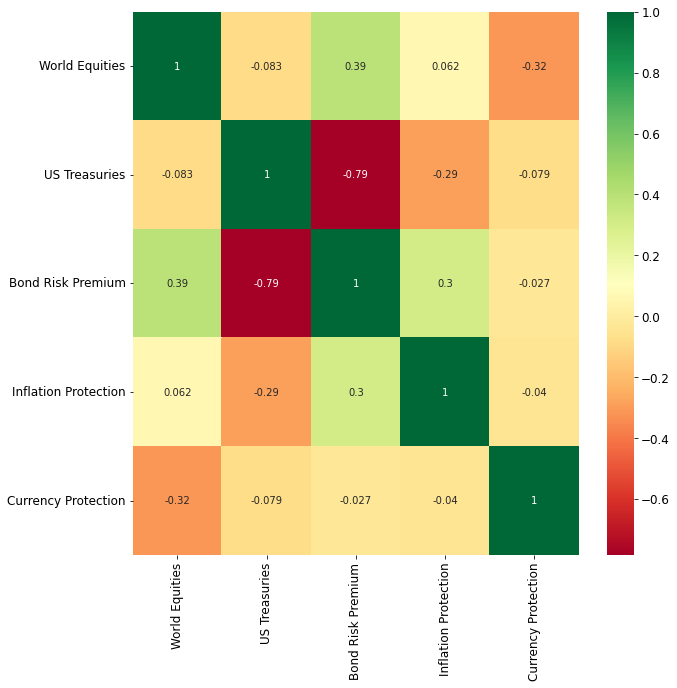

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.subplots(figsize=(10,10))
sns.heatmap(x_scld.corr(),cmap='RdYlGn',annot=True)
plt.show()

# STEP2 SPLIT TEST AND TRAIN

In [ ]:
train_x,test_x,train_y,test_y=train_test_split(x_scld,y,test_size=0.20,random_state=1)
train_x.shape
test_x.shape
train_y.shape
test_y.shape

(324, 5)

(81, 5)

(324,)

(81,)

#STEP 3:CREATE INSTANT OF THE MODEL

In [ ]:
lm=LinearRegression()
lm

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

# STEP 4:FIT THE MODEL

In [ ]:
lm.fit(train_x,train_y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

# STEP5 PREDICT USING THE TRAINED MODEL

In [ ]:
predicted_values=lm.predict(test_x)
predicted_values

array([ 0.05538451, -0.03622733, -0.08594798,  0.00628717, -0.00154555,
        0.12210381,  0.03893399,  0.04231967,  0.00156406, -0.0312221 ,
        0.01620849, -0.00153424,  0.03061638,  0.03610184, -0.02325584,
        0.01762013, -0.08498794,  0.00998021, -0.00765457,  0.06265391,
        0.02829381, -0.01001443,  0.01350164,  0.00906377,  0.03039118,
        0.03946721,  0.00568533, -0.0019368 ,  0.02571232,  0.02841327,
       -0.02209475,  0.04166913, -0.00569954,  0.05803926,  0.03298245,
       -0.00692353,  0.01876072,  0.01403109,  0.00421807, -0.02848417,
        0.02287634, -0.02877099, -0.02084729,  0.01067014, -0.0005809 ,
        0.01524353,  0.00268623,  0.01524462,  0.06693031,  0.00805341,
       -0.00746988,  0.10607618, -0.08571374,  0.12351633,  0.02032972,
       -0.00308857,  0.02093153,  0.03968502,  0.02350817, -0.01323133,
       -0.01012436,  0.0240731 ,  0.02325962, -0.00494603,  0.00399722,
       -0.0035544 , -0.03731771,  0.03503255,  0.0270246 , -0.01

# #STEP6-EVALUATE MODEL PERFORMANCE for Linear Regression-OLS Model without Noise

In [ ]:
#STEP6-EVALUATE MODEL PERFORMANCE
from sklearn.metrics import mean_absolute_error
print("MEAN ABSOLUTE ERROR (MAE) FOR TEST DATA IS")
round(mean_absolute_error(predicted_values,test_y),5)

MEAN ABSOLUTE ERROR (MAE) FOR TEST DATA IS


0.02039

In [ ]:
from sklearn import metrics
print("MEAN SQUARE ERROR (MSE) FOR TEST DATA IS")
np.round(metrics.mean_squared_error(test_y,predicted_values),5)

MEAN SQUARE ERROR (MSE) FOR TEST DATA IS


0.00071

In [ ]:
from sklearn.metrics import median_absolute_error
print("MEDIAN ABSOLUTE ERROR (MAE) FOR TEST DATA IS")
round(median_absolute_error(predicted_values,test_y),5)

MEDIAN ABSOLUTE ERROR (MAE) FOR TEST DATA IS


0.01331

In [ ]:
"R-SQUARE VALUE FOR TEST DATA IS"
np.round(lm.score(test_x,test_y)*100,0)

'R-SQUARE VALUE FOR TEST DATA IS'

68.0

In [ ]:
"R-SQUARE VALUE FOR TRAIN DATA IS"
np.round(lm.score(train_x,train_y)*100,0)

'R-SQUARE VALUE FOR TRAIN DATA IS'

61.0

In [ ]:
print(lm.coef_)
df_m=pd.DataFrame({'features':x.columns,'coeff':lm.coef_})

[0.20016799 0.12687234 0.24936012 0.00251659 0.05921082]


In [ ]:
df_m=df_m.sort_values(by=['coeff'])

# coef_ for Linear Regression-OLS Model without Noise

In [ ]:
df_m

features     coeff
3  Inflation Protection  0.002517
4   Currency Protection  0.059211
1         US Treasuries  0.126872
0        World Equities  0.200168
2     Bond Risk Premium  0.249360

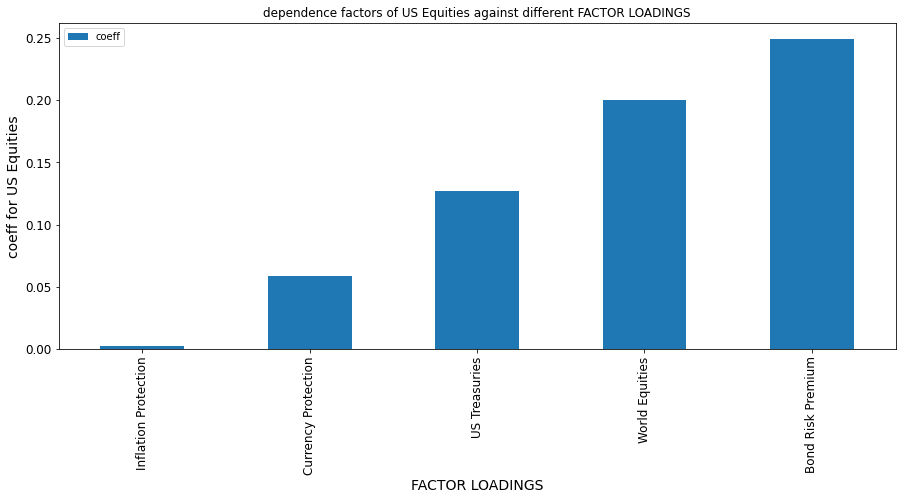

In [ ]:
df_m.plot(x='features',y='coeff',kind='bar',figsize=(15,6))
plt.title('dependence factors of US Equities against different FACTOR LOADINGS')
plt.xlabel('FACTOR LOADINGS')
plt.ylabel('coeff for US Equities')
plt.show();

In [ ]:
#INVERSE SCALING TO REVERT BACK TO SAME SCALE
df1=pd.DataFrame(scld.inverse_transform(x_scld),columns=x.columns)
df1.head()
x.head()

World Equities  US Treasuries  ...  Inflation Protection  Currency Protection
0        0.028511       0.031500  ...             -0.016265             0.030292
1       -0.009204      -0.044692  ...              0.006362             0.010258
2        0.075134       0.028719  ...             -0.002848            -0.020739
3       -0.002459       0.023084  ...              0.003089             0.008187
4        0.040245       0.086780  ...              0.004077            -0.002219

[5 rows x 5 columns]

World Equities  US Treasuries  ...  Inflation Protection  Currency Protection
0        0.028511       0.031500  ...             -0.016265             0.030292
1       -0.009204      -0.044692  ...              0.006362             0.010258
2        0.075134       0.028719  ...             -0.002848            -0.020739
3       -0.002459       0.023084  ...              0.003089             0.008187
4        0.040245       0.086780  ...              0.004077            -0.002219

[5 rows x 5 columns]

In [ ]:
#In the last step we are appending the predicted house prices into 
#the original data and computing the error in estimation for the test data.
fdf=pd.concat([test_x,test_y],1)

In [ ]:
fdf['Predicted']=np.round(predicted_values,5)
fdf['Prediction_Error']=fdf['US Equities']-fdf['Predicted']
fdf.head(5)

World Equities  US Treasuries  ...  Predicted  Prediction_Error
361        0.709938       0.142291  ...    0.05538         -0.004552
62         0.294506       0.361410  ...   -0.03623          0.052996
320        0.236217       0.717142  ...   -0.08595         -0.008163
92         0.510168       0.428393  ...    0.00629         -0.002725
146        0.574908       0.274209  ...   -0.00155         -0.045908

[5 rows x 8 columns]

(<Figure size 720x720 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7f469d4af390>)

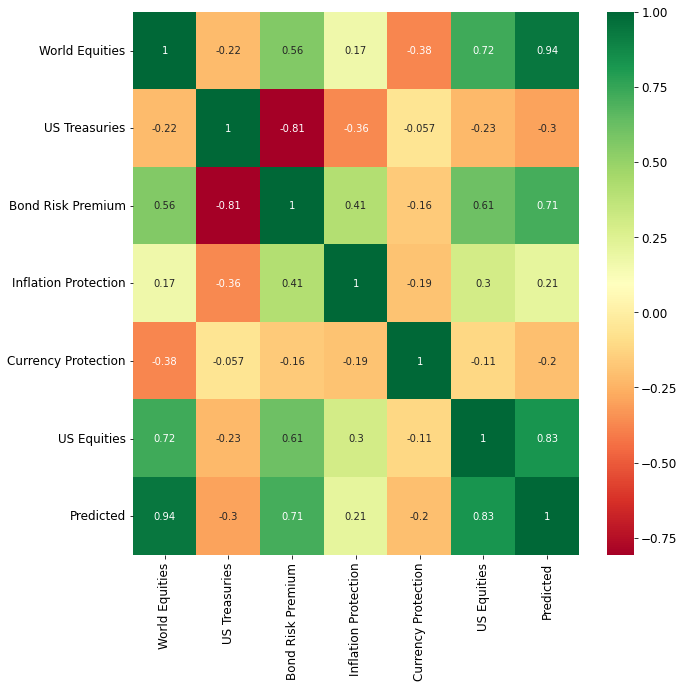

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.subplots(figsize=(10,10))
df1=fdf.drop(['Prediction_Error'],axis=1)
sns.heatmap(df1.corr(),cmap='RdYlGn',annot=True)
plt.show()

we will plot the actual US Equities values from our dataset against the predicted values. This will tell us how accurate our model is. we will  be using a scatter plot. 

(<Figure size 1080x720 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7f469ebd3f90>)

Text(0.5, 1.0, 'Predicted vs Actual US Equities')

Text(0.5, 0, 'Date')

Text(0, 0.5, 'Actual & Predicted US Equities')

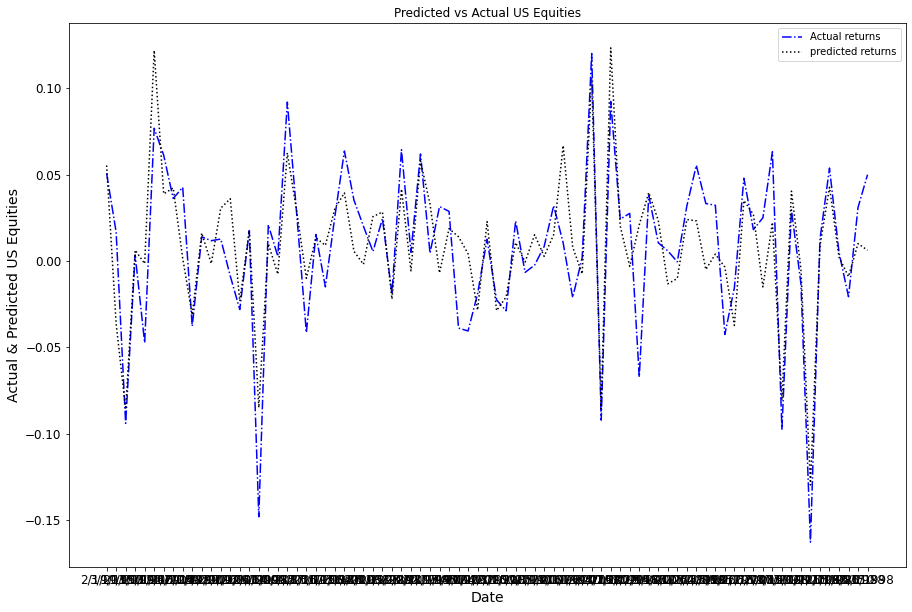

In [ ]:
fdf['Date']=all_data['Date']
plt.subplots(figsize=(15,10))
plt.plot(fdf['Date'],fdf['US Equities'], label = "Actual returns", linestyle="-.",color = 'blue')
plt.plot(fdf['Date'],fdf['Predicted'], label = "predicted returns", linestyle=":",color = 'black')
plt.legend()
plt.title('Predicted vs Actual US Equities')
plt.xlabel('Date')
plt.ylabel('Actual & Predicted US Equities')
plt.show()

#Calculate a noise variable and add as independent variable

In [ ]:
#Calculate a noise variable
std = all_data['World Equities'].std()*(2)
nPeriods = all_data.shape[0]
np.random.seed(1245)
noise = np.random.normal(loc=0, size=(nPeriods))
noise = np.reshape(std*noise + np.array(all_data['World Equities']), (nPeriods,1))

# Linear Regression-OLS Model via Scikit-learn along with Noise

In [ ]:
x['Noise'] = noise
x.head(5)
arr_scld=scld.fit_transform(x)
x_scld=pd.DataFrame(arr_scld,columns=x.columns)
x_scld.head()

World Equities  US Treasuries  ...  Currency Protection     Noise
0        0.028511       0.031500  ...             0.030292  0.111692
1       -0.009204      -0.044692  ...             0.010258 -0.046469
2        0.075134       0.028719  ...            -0.020739  0.110360
3       -0.002459       0.023084  ...             0.008187  0.131240
4        0.040245       0.086780  ...            -0.002219  0.110438

[5 rows x 6 columns]

World Equities  US Treasuries  ...  Currency Protection     Noise
0        0.650879       0.496695  ...             0.639215  0.634504
1        0.545729       0.185428  ...             0.441334  0.431227
2        0.780865       0.485334  ...             0.135170  0.632792
3        0.564534       0.462313  ...             0.420878  0.659628
4        0.683594       0.722530  ...             0.318096  0.632893

[5 rows x 6 columns]

In [ ]:
train_x,test_x,train_y,test_y=train_test_split(x_scld,y,test_size=0.20,random_state=1)

In [ ]:
lm=LinearRegression()
lm

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [ ]:
lm.fit(train_x,train_y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [ ]:
predicted_values=lm.predict(test_x)
predicted_values

array([ 5.11155314e-02, -3.51114202e-02, -8.26887188e-02,  2.84812873e-03,
       -2.37807865e-03,  1.24730530e-01,  3.78623026e-02,  4.31908224e-02,
        2.19304741e-03, -3.40265483e-02,  1.31103922e-02, -1.64244465e-05,
        2.97841659e-02,  3.85571209e-02, -2.50627699e-02,  1.80208879e-02,
       -8.67637798e-02,  1.67381951e-02, -6.34778412e-03,  6.32006644e-02,
        2.61804874e-02, -7.65722746e-03,  1.68061706e-02,  9.39229185e-03,
        3.02079652e-02,  3.70021719e-02,  8.49919499e-03,  1.58039095e-03,
        2.84915882e-02,  3.09033407e-02, -1.91008772e-02,  4.07911743e-02,
       -1.08261362e-02,  5.10078282e-02,  3.73583027e-02, -3.04279480e-03,
        1.95106612e-02,  1.64359592e-02,  1.14005577e-02, -2.75704429e-02,
        2.62258690e-02, -2.92119027e-02, -2.28761411e-02,  1.02413965e-02,
        5.73162536e-03,  1.80230951e-02,  3.60719131e-03,  1.30606231e-02,
        6.50409424e-02,  7.73242761e-03, -8.23557930e-03,  1.07587172e-01,
       -9.10313286e-02,  

In [ ]:
#STEP6-EVALUATE MODEL PERFORMANCE
from sklearn.metrics import mean_absolute_error
print("MEAN ABSOLUTE ERROR (MAE) FOR TEST DATA IS")
round(mean_absolute_error(predicted_values,test_y),5)

MEAN ABSOLUTE ERROR (MAE) FOR TEST DATA IS


0.02031

In [ ]:
from sklearn import metrics
print("MEAN SQUARE ERROR (MSE) FOR TEST DATA IS")
np.round(metrics.mean_squared_error(test_y,predicted_values),5)

MEAN SQUARE ERROR (MSE) FOR TEST DATA IS


0.00072

In [ ]:
from sklearn.metrics import median_absolute_error
print("MEDIAN ABSOLUTE ERROR (MAE) FOR TEST DATA IS")
round(median_absolute_error(predicted_values,test_y),5)

MEDIAN ABSOLUTE ERROR (MAE) FOR TEST DATA IS


0.01357

In [ ]:
"R-SQUARE VALUE FOR TEST DATA IS"
np.round(lm.score(test_x,test_y)*100,0)

'R-SQUARE VALUE FOR TEST DATA IS'

68.0

In [ ]:
"R-SQUARE VALUE FOR TRAIN DATA IS"
np.round(lm.score(train_x,train_y)*100,0)

'R-SQUARE VALUE FOR TRAIN DATA IS'

61.0

In [ ]:
print(lm.coef_)
df_m=pd.DataFrame({'features':x.columns,'coeff':lm.coef_})

[ 0.21056458  0.13139595  0.25500732  0.00132181  0.05734526 -0.02056202]


# coef_ for Linear Regression-OLS Model with Noise

In [ ]:
df_m=df_m.sort_values(by=['coeff'])

In [ ]:
df_m

features     coeff
5                 Noise -0.020562
3  Inflation Protection  0.001322
4   Currency Protection  0.057345
1         US Treasuries  0.131396
0        World Equities  0.210565
2     Bond Risk Premium  0.255007

# Lasso Regression via Scikit-learn along with Noise

In [ ]:
from sklearn.linear_model import Lasso
lambda1 =0.1

In [ ]:
lassoReg = Lasso(alpha=lambda1/(2*all_data.shape[0]), fit_intercept=True)

In [ ]:
lassoReg.fit(train_x,train_y)

Lasso(alpha=0.0001234567901234568, copy_X=True, fit_intercept=True,
      max_iter=1000, normalize=False, positive=False, precompute=False,
      random_state=None, selection='cyclic', tol=0.0001, warm_start=False)

In [ ]:
predicted_values=lassoReg.predict(test_x)
predicted_values

array([ 0.05177995, -0.04119955, -0.08153758,  0.00202902,  0.00252444,
        0.11575912,  0.0408479 ,  0.03480083, -0.00168137, -0.02850296,
        0.01208379, -0.00094214,  0.02776151,  0.03590113, -0.02064454,
        0.01513333, -0.07996874,  0.01239737, -0.0045006 ,  0.05864002,
        0.02667014, -0.00688755,  0.01435368,  0.00857544,  0.03051008,
        0.03804526,  0.00562207, -0.00422167,  0.02595284,  0.03118801,
       -0.02271589,  0.03338988, -0.00837142,  0.05733082,  0.03557357,
       -0.00846067,  0.01966887,  0.01691584,  0.00507586, -0.02251158,
        0.02080397, -0.02932458, -0.01580548,  0.0116382 , -0.00096531,
        0.01593908,  0.00267403,  0.01290156,  0.06345803,  0.01008259,
       -0.00366269,  0.09261862, -0.07530253,  0.10974557,  0.01828907,
       -0.00173039,  0.02516861,  0.03810062,  0.02092155, -0.00769779,
       -0.01060576,  0.02360492,  0.02470818, -0.00547391,  0.00621521,
        0.00044837, -0.03758217,  0.03505846,  0.0223414 , -0.01

# EVALUATE MODEL PERFORMANCE for Lasso Regression  along with Noise

In [ ]:
#STEP6-EVALUATE MODEL PERFORMANCE
from sklearn.metrics import mean_absolute_error
print("MEAN ABSOLUTE ERROR (MAE) FOR TEST DATA IS")
round(mean_absolute_error(predicted_values,test_y),3)

MEAN ABSOLUTE ERROR (MAE) FOR TEST DATA IS


0.021

In [ ]:
from sklearn import metrics
print("MEAN SQUARE ERROR (MSE) FOR TEST DATA IS")
np.round(metrics.mean_squared_error(test_y,predicted_values),5)

MEAN SQUARE ERROR (MSE) FOR TEST DATA IS


0.00077

In [ ]:
from sklearn.metrics import median_absolute_error
print("MEDIAN ABSOLUTE ERROR (MAE) FOR TEST DATA IS")
round(median_absolute_error(predicted_values,test_y),5)

MEDIAN ABSOLUTE ERROR (MAE) FOR TEST DATA IS


0.01504

In [ ]:
"R-SQUARE VALUE FOR TEST DATA IS"
np.round(lassoReg.score(test_x,test_y)*100,0)

'R-SQUARE VALUE FOR TEST DATA IS'

66.0

In [ ]:
"R-SQUARE VALUE FOR TRAIN DATA IS"
np.round(lassoReg.score(train_x,train_y)*100,0)

'R-SQUARE VALUE FOR TRAIN DATA IS'

60.0

In [ ]:
print(lm.coef_)
df_m=pd.DataFrame({'features':x.columns,'coeff':lassoReg.coef_})

[ 0.21056458  0.13139595  0.25500732  0.00132181  0.05734526 -0.02056202]


In [ ]:
df_m=df_m.sort_values(by=['coeff'])

# lassoReg.coef_ for Lasso Regression with Noise

In [ ]:
df_m

features     coeff
5                 Noise -0.006096
3  Inflation Protection  0.000000
4   Currency Protection  0.048936
1         US Treasuries  0.076087
2     Bond Risk Premium  0.170120
0        World Equities  0.208327

In [ ]:
x['Noise'] = noise
x=x.drop(['Noise'],axis=1)
x.head()

World Equities  US Treasuries  ...  Inflation Protection  Currency Protection
0        0.028511       0.031500  ...             -0.016265             0.030292
1       -0.009204      -0.044692  ...              0.006362             0.010258
2        0.075134       0.028719  ...             -0.002848            -0.020739
3       -0.002459       0.023084  ...              0.003089             0.008187
4        0.040245       0.086780  ...              0.004077            -0.002219

[5 rows x 5 columns]

# Lasso Regression via Scikit-learn without Noise

In [ ]:
arr_scld=scld.fit_transform(x)
x_scld=pd.DataFrame(arr_scld,columns=x.columns)
x_scld.head()

World Equities  US Treasuries  ...  Inflation Protection  Currency Protection
0        0.650879       0.496695  ...              0.428702             0.639215
1        0.545729       0.185428  ...              0.573976             0.441334
2        0.780865       0.485334  ...              0.514844             0.135170
3        0.564534       0.462313  ...              0.552962             0.420878
4        0.683594       0.722530  ...              0.559305             0.318096

[5 rows x 5 columns]

In [ ]:
train_x,test_x,train_y,test_y=train_test_split(x_scld,y,test_size=0.20,random_state=1)

In [ ]:
from sklearn.linear_model import Lasso
lambda1 =0.1

In [ ]:
lassoReg = Lasso(alpha=lambda1/(2*all_data.shape[0]), fit_intercept=True)

In [ ]:
lassoReg.fit(train_x,train_y)

Lasso(alpha=0.0001234567901234568, copy_X=True, fit_intercept=True,
      max_iter=1000, normalize=False, positive=False, precompute=False,
      random_state=None, selection='cyclic', tol=0.0001, warm_start=False)

In [ ]:
predicted_values=lassoReg.predict(test_x)
predicted_values

array([ 5.30642408e-02, -4.15379369e-02, -8.24802990e-02,  3.03032189e-03,
        2.78996838e-03,  1.14931488e-01,  4.11587659e-02,  3.45202618e-02,
       -1.91288928e-03, -2.77111343e-02,  1.30246756e-02, -1.37309561e-03,
        2.80303547e-02,  3.52031925e-02, -2.01230541e-02,  1.50060662e-02,
       -7.94051974e-02,  1.03327359e-02, -4.86674832e-03,  5.84825729e-02,
        2.73021576e-02, -7.56706402e-03,  1.33859782e-02,  8.45473720e-03,
        3.05970143e-02,  3.87426200e-02,  4.79007979e-03, -5.25299151e-03,
        2.50983633e-02,  3.04380451e-02, -2.35958419e-02,  3.36199012e-02,
       -6.85237879e-03,  5.94296438e-02,  3.43085989e-02, -9.65232852e-03,
        1.94431179e-02,  1.62111115e-02,  2.93684114e-03, -2.27944676e-02,
        1.99026194e-02, -2.91968606e-02, -1.52074359e-02,  1.17825213e-02,
       -2.84680873e-03,  1.51081999e-02,  2.41678149e-03,  1.35450613e-02,
        6.40113851e-02,  1.01786856e-02, -3.44624718e-03,  9.21366506e-02,
       -7.38180047e-02,  

In [ ]:
#INVERSE SCALING TO REVERT BACK TO SAME SCALE
df1=pd.DataFrame(scld.inverse_transform(x_scld),columns=x.columns)
df1.head()
x.head()

World Equities  US Treasuries  ...  Inflation Protection  Currency Protection
0        0.028511       0.031500  ...             -0.016265             0.030292
1       -0.009204      -0.044692  ...              0.006362             0.010258
2        0.075134       0.028719  ...             -0.002848            -0.020739
3       -0.002459       0.023084  ...              0.003089             0.008187
4        0.040245       0.086780  ...              0.004077            -0.002219

[5 rows x 5 columns]

World Equities  US Treasuries  ...  Inflation Protection  Currency Protection
0        0.028511       0.031500  ...             -0.016265             0.030292
1       -0.009204      -0.044692  ...              0.006362             0.010258
2        0.075134       0.028719  ...             -0.002848            -0.020739
3       -0.002459       0.023084  ...              0.003089             0.008187
4        0.040245       0.086780  ...              0.004077            -0.002219

[5 rows x 5 columns]

In [ ]:
#In the last step we are appending the predicted house prices into 
#the original data and computing the error in estimation for the test data.
fdf=pd.concat([test_x,test_y],1)

In [ ]:
fdf['Predicted']=np.round(predicted_values,5)
fdf['Prediction_Error']=fdf['US Equities']-fdf['Predicted']
fdf.head(5)

World Equities  US Treasuries  ...  Predicted  Prediction_Error
361        0.709938       0.142291  ...    0.05306         -0.002232
62         0.294506       0.361410  ...   -0.04154          0.058306
320        0.236217       0.717142  ...   -0.08248         -0.011633
92         0.510168       0.428393  ...    0.00303          0.000535
146        0.574908       0.274209  ...    0.00279         -0.050248

[5 rows x 8 columns]

(<Figure size 720x720 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7f469e8ede50>)

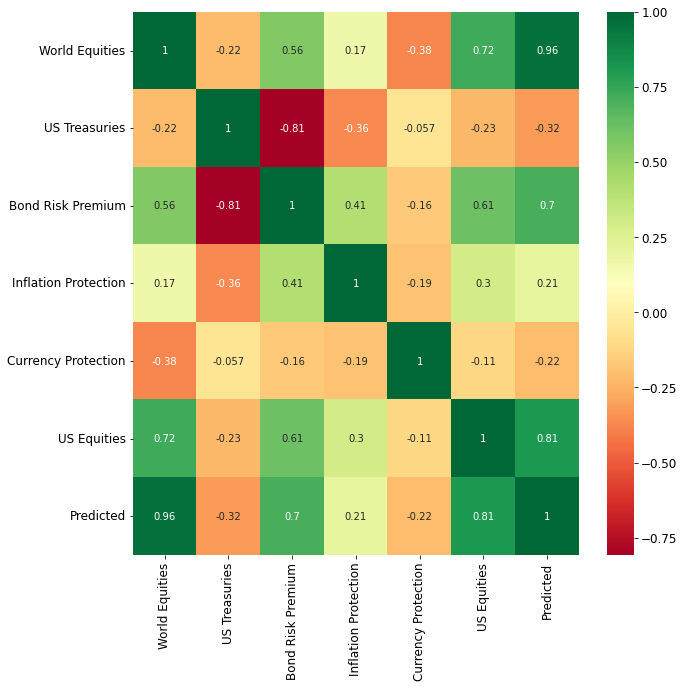

In [ ]:
plt.subplots(figsize=(10,10))
df1=fdf.drop(['Prediction_Error'],axis=1)
sns.heatmap(df1.corr(),cmap='RdYlGn',annot=True)
plt.show()

(<Figure size 1080x720 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7f469e7e4190>)

Text(0.5, 1.0, 'Predicted vs Actual US Equities')

Text(0.5, 0, 'Date')

Text(0, 0.5, 'Actual & Predicted US Equities')

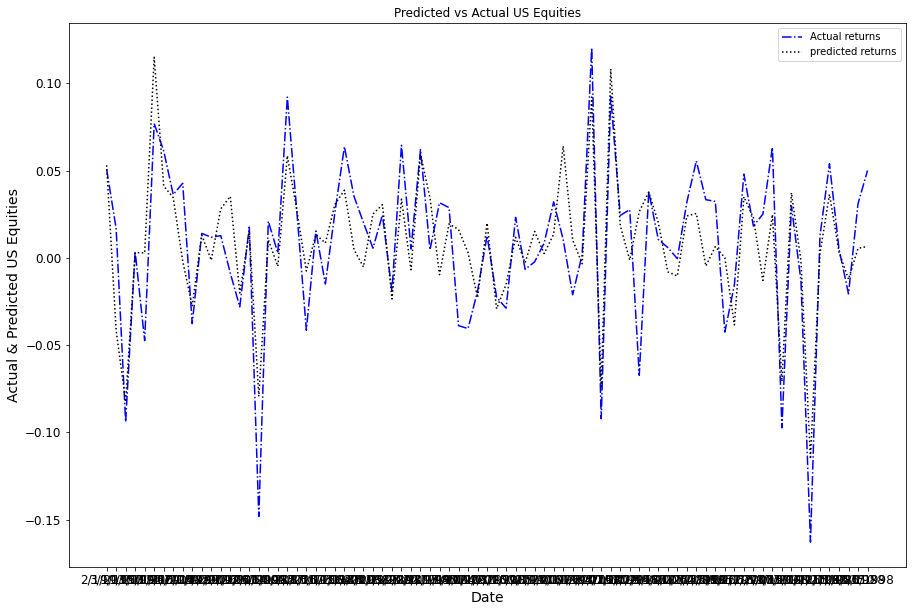

In [ ]:
fdf['Date']=all_data['Date']
plt.subplots(figsize=(15,10))
plt.plot(fdf['Date'],fdf['US Equities'], label = "Actual returns", linestyle="-.",color = 'blue')
plt.plot(fdf['Date'],fdf['Predicted'], label = "predicted returns", linestyle=":",color = 'black')
plt.legend()
plt.title('Predicted vs Actual US Equities')
plt.xlabel('Date')
plt.ylabel('Actual & Predicted US Equities')
plt.show()

# EVALUATE MODEL PERFORMANCE for Lasso Regression without Noise

In [ ]:
#STEP6-EVALUATE MODEL PERFORMANCE
from sklearn.metrics import mean_absolute_error
print("MEAN ABSOLUTE ERROR (MAE) FOR TEST DATA IS")
round(mean_absolute_error(predicted_values,test_y),3)

MEAN ABSOLUTE ERROR (MAE) FOR TEST DATA IS


0.021

In [ ]:
from sklearn import metrics
print("MEAN SQUARE ERROR (MSE) FOR TEST DATA IS")
np.round(metrics.mean_squared_error(test_y,predicted_values),5)

MEAN SQUARE ERROR (MSE) FOR TEST DATA IS


0.00077

In [ ]:
from sklearn.metrics import median_absolute_error
print("MEDIAN ABSOLUTE ERROR (MAE) FOR TEST DATA IS")
round(median_absolute_error(predicted_values,test_y),5)

MEDIAN ABSOLUTE ERROR (MAE) FOR TEST DATA IS


0.01531

In [ ]:
"R-SQUARE VALUE FOR TEST DATA IS"
np.round(lassoReg.score(test_x,test_y)*100,0)

'R-SQUARE VALUE FOR TEST DATA IS'

66.0

In [ ]:
"R-SQUARE VALUE FOR TRAIN DATA IS"
np.round(lassoReg.score(train_x,train_y)*100,0)

'R-SQUARE VALUE FOR TRAIN DATA IS'

60.0

In [ ]:
print(lassoReg.coef_)
df_m=pd.DataFrame({'features':x.columns,'coeff':lassoReg.coef_})

[0.20523172 0.0747081  0.16854275 0.         0.04947952]


In [ ]:
df_m=df_m.sort_values(by=['coeff'])

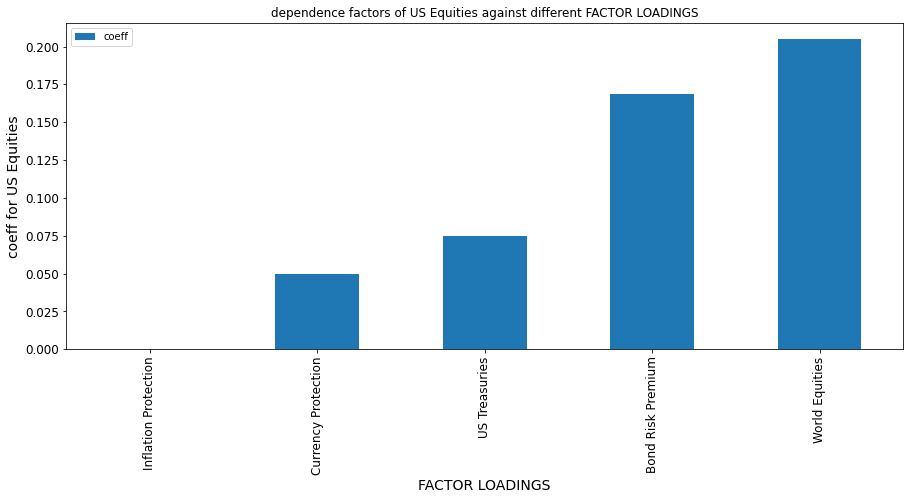

In [ ]:
df_m.plot(x='features',y='coeff',kind='bar',figsize=(15,6))
plt.title('dependence factors of US Equities against different FACTOR LOADINGS')
plt.xlabel('FACTOR LOADINGS')
plt.ylabel('coeff for US Equities')
plt.show();

# lassoReg.coef_ for Lasso Regression without Noise

In [ ]:
df_m

features     coeff
3  Inflation Protection  0.000000
4   Currency Protection  0.049480
1         US Treasuries  0.074708
2     Bond Risk Premium  0.168543
0        World Equities  0.205232

In [ ]:
from sklearn.model_selection import GridSearchCV
maxLambda1 = .25
nLambdas = 100
randomState = 7777
nFolds = 10

# CV Lasso via Scikit-learn without Noise

In [ ]:
alphaMax = maxLambda1 / (2*all_data.shape[0])
alphas = np.linspace(1e-6, alphaMax,nLambdas)
lassoTest = Lasso(random_state = randomState, fit_intercept=True)
tuned_parameters = [{'alpha': alphas}]
clf = GridSearchCV(lassoTest, tuned_parameters, cv=nFolds, refit=True)

In [ ]:
clf.fit(train_x,train_y)
lassoBest = clf.best_estimator_
alphaBest = clf.best_params_['alpha']

GridSearchCV(cv=10, error_score=nan,
             estimator=Lasso(alpha=1.0, copy_X=True, fit_intercept=True,
                             max_iter=1000, normalize=False, positive=False,
                             precompute=False, random_state=7777,
                             selection='cyclic', tol=0.0001, warm_start=False),
             iid='deprecated', n_jobs=None,
             param_grid=[{'alpha': array([1.00000000e-06, 4.10749470e-06, 7.21498940e-06, 1.03224841e-05,
       1.34299788e-0...
       2.49599576e-04, 2.52707071e-04, 2.55814565e-04, 2.58922060e-04,
       2.62029555e-04, 2.65137050e-04, 2.68244544e-04, 2.71352039e-04,
       2.74459534e-04, 2.77567028e-04, 2.80674523e-04, 2.83782018e-04,
       2.86889512e-04, 2.89997007e-04, 2.93104502e-04, 2.96211997e-04,
       2.99319491e-04, 3.02426986e-04, 3.05534481e-04, 3.08641975e-04])}],
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

In [ ]:
lassoBest

Lasso(alpha=5.0719915201396676e-05, copy_X=True, fit_intercept=True,
      max_iter=1000, normalize=False, positive=False, precompute=False,
      random_state=7777, selection='cyclic', tol=0.0001, warm_start=False)

In [ ]:
alphaBest

5.0719915201396676e-05

In [ ]:
predicted_values=clf.predict(test_x)
predicted_values

array([ 5.45103692e-02, -3.84437007e-02, -8.44259090e-02,  4.87179306e-03,
        3.15714680e-04,  1.18952569e-01,  3.98206288e-02,  3.90191283e-02,
       -5.38922266e-05, -2.99447349e-02,  1.49933101e-02, -1.38852600e-03,
        2.96456577e-02,  3.58581753e-02, -2.20277138e-02,  1.65102707e-02,
       -8.25392882e-02,  9.86921474e-03, -6.42000616e-03,  6.09598724e-02,
        2.79100133e-02, -8.92771565e-03,  1.35048764e-02,  8.71593129e-03,
        3.06117657e-02,  3.90300072e-02,  5.32698354e-03, -3.25220258e-03,
        2.53326769e-02,  2.91974545e-02, -2.26806641e-02,  3.82324413e-02,
       -6.17766718e-03,  5.86713635e-02,  3.36639462e-02, -8.21840354e-03,
        1.90267232e-02,  1.49619715e-02,  3.65037189e-03, -2.61953058e-02,
        2.20371302e-02, -2.89593281e-02, -1.85429197e-02,  1.11997399e-02,
       -1.55533215e-03,  1.51600429e-02,  2.64072701e-03,  1.45291049e-02,
        6.57040018e-02,  8.93056399e-03, -5.85956190e-03,  1.00203669e-01,
       -8.12091201e-02,  

In [ ]:
#INVERSE SCALING TO REVERT BACK TO SAME SCALE
df1=pd.DataFrame(scld.inverse_transform(x_scld),columns=x.columns)
df1.head()
x.head()

World Equities  US Treasuries  ...  Inflation Protection  Currency Protection
0        0.028511       0.031500  ...             -0.016265             0.030292
1       -0.009204      -0.044692  ...              0.006362             0.010258
2        0.075134       0.028719  ...             -0.002848            -0.020739
3       -0.002459       0.023084  ...              0.003089             0.008187
4        0.040245       0.086780  ...              0.004077            -0.002219

[5 rows x 5 columns]

World Equities  US Treasuries  ...  Inflation Protection  Currency Protection
0        0.028511       0.031500  ...             -0.016265             0.030292
1       -0.009204      -0.044692  ...              0.006362             0.010258
2        0.075134       0.028719  ...             -0.002848            -0.020739
3       -0.002459       0.023084  ...              0.003089             0.008187
4        0.040245       0.086780  ...              0.004077            -0.002219

[5 rows x 5 columns]

In [ ]:
#In the last step we are appending the predicted house prices into 
#the original data and computing the error in estimation for the test data.
fdf=pd.concat([test_x,test_y],1)

In [ ]:
fdf['Predicted']=np.round(predicted_values,5)
fdf['Prediction_Error']=fdf['US Equities']-fdf['Predicted']
fdf.head(5)

World Equities  US Treasuries  ...  Predicted  Prediction_Error
361        0.709938       0.142291  ...    0.05451         -0.003682
62         0.294506       0.361410  ...   -0.03844          0.055206
320        0.236217       0.717142  ...   -0.08443         -0.009683
92         0.510168       0.428393  ...    0.00487         -0.001305
146        0.574908       0.274209  ...    0.00032         -0.047778

[5 rows x 8 columns]

(<Figure size 720x720 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7f469e650d90>)

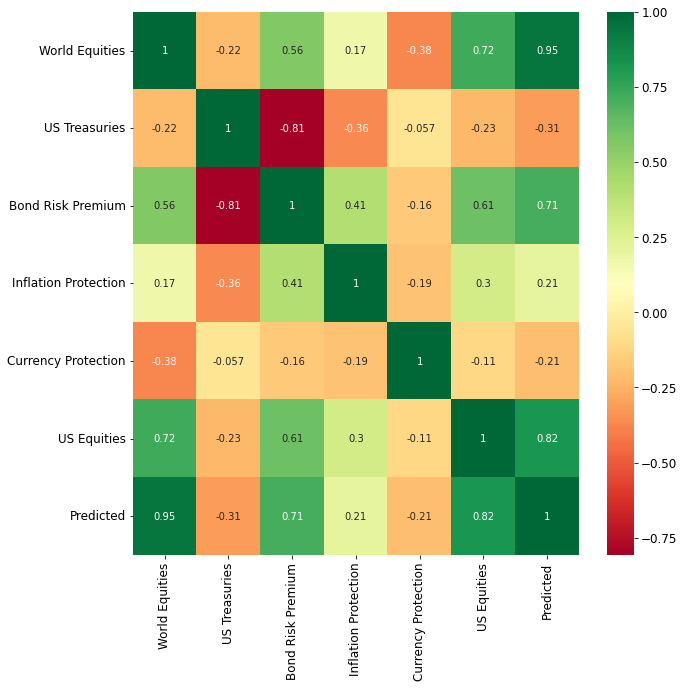

In [ ]:
plt.subplots(figsize=(10,10))
df1=fdf.drop(['Prediction_Error'],axis=1)
sns.heatmap(df1.corr(),cmap='RdYlGn',annot=True)
plt.show()

(<Figure size 1080x720 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7f469e4925d0>)

Text(0.5, 1.0, 'Predicted vs Actual US Equities')

Text(0.5, 0, 'Date')

Text(0, 0.5, 'Actual & Predicted US Equities')

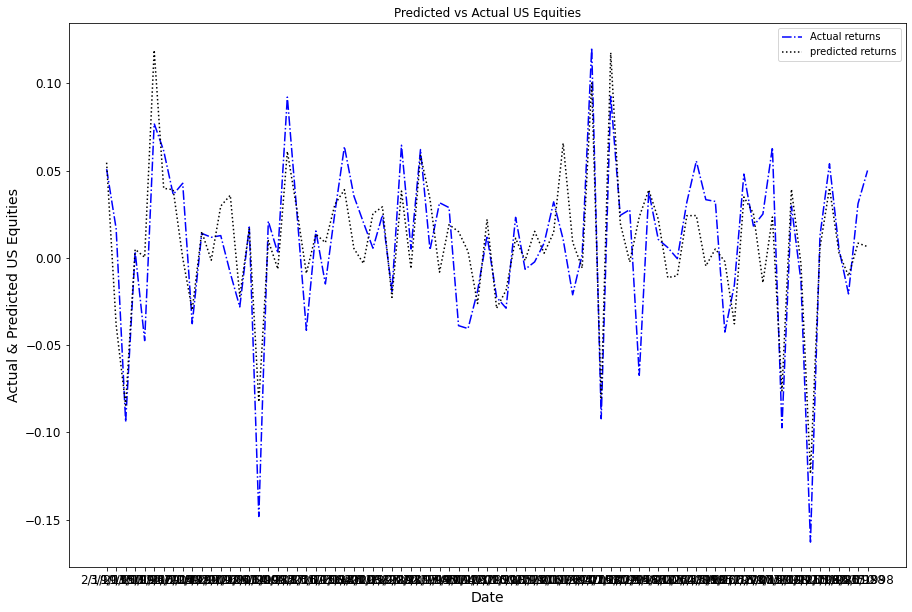

In [ ]:
fdf['Date']=all_data['Date']
plt.subplots(figsize=(15,10))
plt.plot(fdf['Date'],fdf['US Equities'], label = "Actual returns", linestyle="-.",color = 'blue')
plt.plot(fdf['Date'],fdf['Predicted'], label = "predicted returns", linestyle=":",color = 'black')
plt.legend()
plt.title('Predicted vs Actual US Equities')
plt.xlabel('Date')
plt.ylabel('Actual & Predicted US Equities')
plt.show()

# EVALUATE MODEL PERFORMANCE for CV Lasso without Noise

In [ ]:
from sklearn.metrics import mean_absolute_error
print("MEAN ABSOLUTE ERROR (MAE) FOR TEST DATA IS")
round(mean_absolute_error(predicted_values,test_y),3)

MEAN ABSOLUTE ERROR (MAE) FOR TEST DATA IS


0.021

In [ ]:
from sklearn import metrics
print("MEAN SQUARE ERROR (MSE) FOR TEST DATA IS")
np.round(metrics.mean_squared_error(test_y,predicted_values),5)

MEAN SQUARE ERROR (MSE) FOR TEST DATA IS


0.00073

In [ ]:
from sklearn.metrics import median_absolute_error
print("MEDIAN ABSOLUTE ERROR (MAE) FOR TEST DATA IS")
round(median_absolute_error(predicted_values,test_y),5)

MEDIAN ABSOLUTE ERROR (MAE) FOR TEST DATA IS


0.01379

In [ ]:
"R-SQUARE VALUE FOR TEST DATA IS"
np.round(clf.score(test_x,test_y)*100,0)

'R-SQUARE VALUE FOR TEST DATA IS'

67.0

In [ ]:
"R-SQUARE VALUE FOR TRAIN DATA IS"
np.round(clf.score(train_x,train_y)*100,0)

'R-SQUARE VALUE FOR TRAIN DATA IS'

60.0

In [ ]:
print(lassoBest.coef_)
df_m=pd.DataFrame({'features':x.columns,'coeff':lassoBest.coef_})

[0.20220003 0.10526329 0.21653865 0.         0.05517435]


In [ ]:
df_m=df_m.sort_values(by=['coeff'])

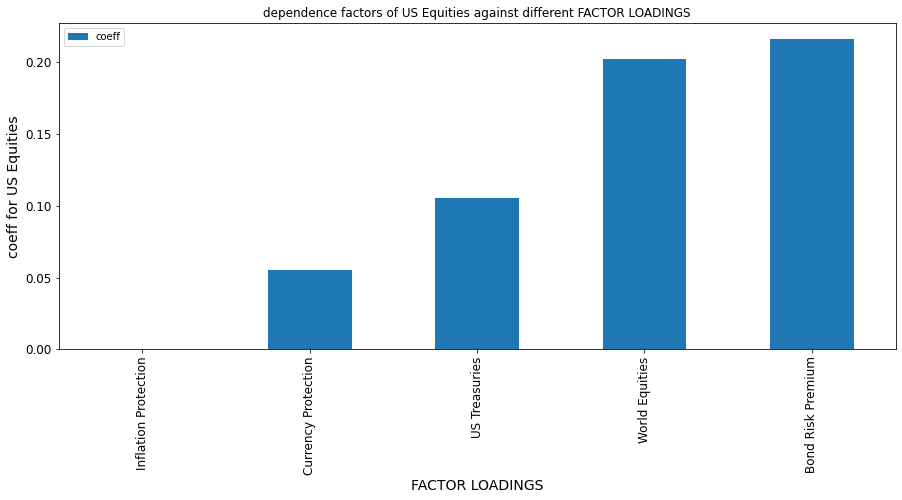

In [ ]:
df_m.plot(x='features',y='coeff',kind='bar',figsize=(15,6))
plt.title('dependence factors of US Equities against different FACTOR LOADINGS')
plt.xlabel('FACTOR LOADINGS')
plt.ylabel('coeff for US Equities')
plt.show();

# CV Elastic Net Scikit-learn without Noise

In [ ]:
maxLambda= .25
maxL1Ratio = .99
nLambdas = 100
nL1Ratios = 100
randomState = 7777
nFolds = 10
from sklearn.linear_model import Ridge
from sklearn.linear_model import ElasticNet

In [ ]:
alphaMax = maxLambda/(2*all_data.shape[0])
alphas = np.linspace(1e-6, alphaMax,nLambdas)
l1RatioMax = maxL1Ratio
l1Ratios = np.linspace(1e-6, l1RatioMax,nL1Ratios)

elasticNetTest = ElasticNet(random_state = randomState, fit_intercept=True)

tuned_parameters = [{'alpha': alphas, 'l1_ratio': l1Ratios}]

clf = GridSearchCV(elasticNetTest, tuned_parameters, cv=nFolds, refit=True)  

In [ ]:
clf.fit(train_x,train_y)
elasticNetBest = clf.best_estimator_
alphaBest = clf.best_params_['alpha']
l1RatioBest = clf.best_params_['l1_ratio']

GridSearchCV(cv=10, error_score=nan,
             estimator=ElasticNet(alpha=1.0, copy_X=True, fit_intercept=True,
                                  l1_ratio=0.5, max_iter=1000, normalize=False,
                                  positive=False, precompute=False,
                                  random_state=7777, selection='cyclic',
                                  tol=0.0001, warm_start=False),
             iid='deprecated', n_jobs=None,
             param_grid=[{'alpha': array([1.00000000e-06, 4.10749470e-06, 7.21498940e-06, 1.03224841...
       8.00000192e-01, 8.10000182e-01, 8.20000172e-01, 8.30000162e-01,
       8.40000152e-01, 8.50000141e-01, 8.60000131e-01, 8.70000121e-01,
       8.80000111e-01, 8.90000101e-01, 9.00000091e-01, 9.10000081e-01,
       9.20000071e-01, 9.30000061e-01, 9.40000051e-01, 9.50000040e-01,
       9.60000030e-01, 9.70000020e-01, 9.80000010e-01, 9.90000000e-01])}],
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             sco

In [ ]:
print('best lambda1 = ' + str(alphaBest*2*all_data.shape[0]*l1RatioBest))
print('best lambda2 = ' + str(all_data.shape[0]*alphaBest*(1-l1RatioBest)))

best lambda1 = 0.041420193680816245
best lambda2 = 0.0010900041696928885


In [ ]:
predicted_values=clf.predict(test_x)
predicted_values

array([ 5.44930344e-02, -3.84823037e-02, -8.43962669e-02,  4.85429807e-03,
        3.45662531e-04,  1.18897395e-01,  3.98327495e-02,  3.89618296e-02,
       -7.30659792e-05, -2.99191950e-02,  1.49656329e-02, -1.38783229e-03,
        2.96268707e-02,  3.58518122e-02, -2.20020901e-02,  1.64961510e-02,
       -8.25024921e-02,  9.87095424e-03, -6.40472781e-03,  6.09322438e-02,
        2.79053103e-02, -8.91156433e-03,  1.35021604e-02,  8.71459015e-03,
        3.06121732e-02,  3.90277165e-02,  5.32454175e-03, -3.27081790e-03,
        2.53308307e-02,  2.92136099e-02, -2.26908603e-02,  3.81803124e-02,
       -6.18340703e-03,  5.86794569e-02,  3.36704888e-02, -8.23512981e-03,
        1.90283795e-02,  1.49743662e-02,  3.64043874e-03, -2.61515088e-02,
        2.20081382e-02, -2.89594046e-02, -1.85013700e-02,  1.12055637e-02,
       -1.57448425e-03,  1.51597495e-02,  2.63506071e-03,  1.45163004e-02,
        6.56910540e-02,  8.94322890e-03, -5.82806411e-03,  1.00110182e-01,
       -8.11245557e-02,  

In [ ]:
#INVERSE SCALING TO REVERT BACK TO SAME SCALE
df1=pd.DataFrame(scld.inverse_transform(x_scld),columns=x.columns)
df1.head()
x.head()

World Equities  US Treasuries  ...  Inflation Protection  Currency Protection
0        0.028511       0.031500  ...             -0.016265             0.030292
1       -0.009204      -0.044692  ...              0.006362             0.010258
2        0.075134       0.028719  ...             -0.002848            -0.020739
3       -0.002459       0.023084  ...              0.003089             0.008187
4        0.040245       0.086780  ...              0.004077            -0.002219

[5 rows x 5 columns]

World Equities  US Treasuries  ...  Inflation Protection  Currency Protection
0        0.028511       0.031500  ...             -0.016265             0.030292
1       -0.009204      -0.044692  ...              0.006362             0.010258
2        0.075134       0.028719  ...             -0.002848            -0.020739
3       -0.002459       0.023084  ...              0.003089             0.008187
4        0.040245       0.086780  ...              0.004077            -0.002219

[5 rows x 5 columns]

In [ ]:
#In the last step we are appending the predicted house prices into 
#the original data and computing the error in estimation for the test data.
fdf=pd.concat([test_x,test_y],1)

In [ ]:
fdf['Predicted']=np.round(predicted_values,5)
fdf['Prediction_Error']=fdf['US Equities']-fdf['Predicted']
fdf.head(5)

World Equities  US Treasuries  ...  Predicted  Prediction_Error
361        0.709938       0.142291  ...    0.05449         -0.003662
62         0.294506       0.361410  ...   -0.03848          0.055246
320        0.236217       0.717142  ...   -0.08440         -0.009713
92         0.510168       0.428393  ...    0.00485         -0.001285
146        0.574908       0.274209  ...    0.00035         -0.047808

[5 rows x 8 columns]

(<Figure size 720x720 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7f469d0d75d0>)

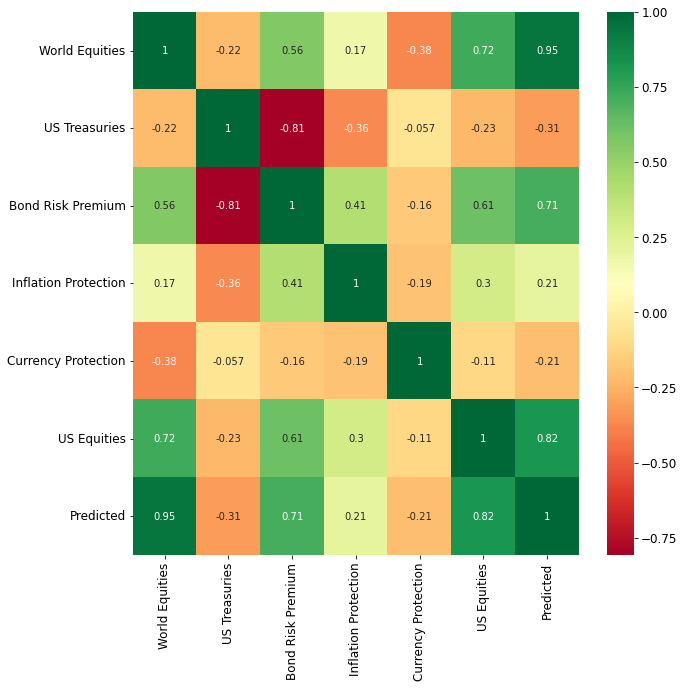

In [ ]:
plt.subplots(figsize=(10,10))
df1=fdf.drop(['Prediction_Error'],axis=1)
sns.heatmap(df1.corr(),cmap='RdYlGn',annot=True)
plt.show()

(<Figure size 1080x720 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7f469e91ac50>)

Text(0.5, 1.0, 'Predicted vs Actual US Equities')

Text(0.5, 0, 'Date')

Text(0, 0.5, 'Actual & Predicted US Equities')

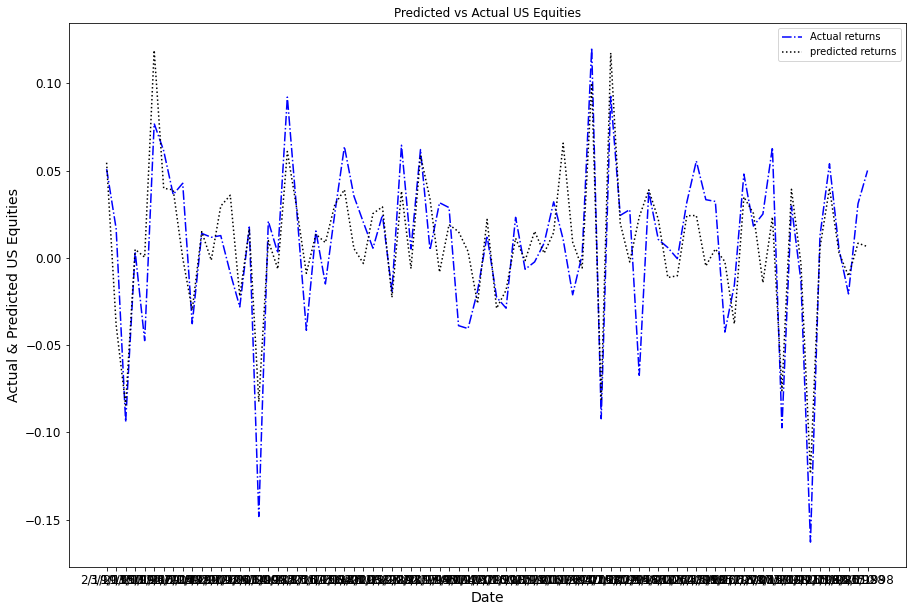

In [ ]:
fdf['Date']=all_data['Date']
plt.subplots(figsize=(15,10))
plt.plot(fdf['Date'],fdf['US Equities'], label = "Actual returns", linestyle="-.",color = 'blue')
plt.plot(fdf['Date'],fdf['Predicted'], label = "predicted returns", linestyle=":",color = 'black')
plt.legend()
plt.title('Predicted vs Actual US Equities')
plt.xlabel('Date')
plt.ylabel('Actual & Predicted US Equities')
plt.show()

# EVALUATE MODEL PERFORMANCE for CV Elastic Net without Noise

In [ ]:
from sklearn.metrics import mean_absolute_error
print("MEAN ABSOLUTE ERROR (MAE) FOR TEST DATA IS")
round(mean_absolute_error(predicted_values,test_y),3)

MEAN ABSOLUTE ERROR (MAE) FOR TEST DATA IS


0.021

In [ ]:
from sklearn import metrics
print("MEAN SQUARE ERROR (MSE) FOR TEST DATA IS")
np.round(metrics.mean_squared_error(test_y,predicted_values),5)

MEAN SQUARE ERROR (MSE) FOR TEST DATA IS


0.00074

In [ ]:
from sklearn.metrics import median_absolute_error
print("MEDIAN ABSOLUTE ERROR (MAE) FOR TEST DATA IS")
round(median_absolute_error(predicted_values,test_y),5)

MEDIAN ABSOLUTE ERROR (MAE) FOR TEST DATA IS


0.01383

In [ ]:
"R-SQUARE VALUE FOR TEST DATA IS"
np.round(clf.score(test_x,test_y)*100,0)

'R-SQUARE VALUE FOR TEST DATA IS'

67.0

In [ ]:
"R-SQUARE VALUE FOR TRAIN DATA IS"
np.round(clf.score(train_x,train_y)*100,0)

'R-SQUARE VALUE FOR TRAIN DATA IS'

60.0

In [ ]:
print(elasticNetBest.coef_)
df_m=pd.DataFrame({'features':x.columns,'coeff':elasticNetBest.coef_})

[0.20224094 0.10490335 0.2159482  0.         0.05512899]


In [ ]:
df_m=df_m.sort_values(by=['coeff'])

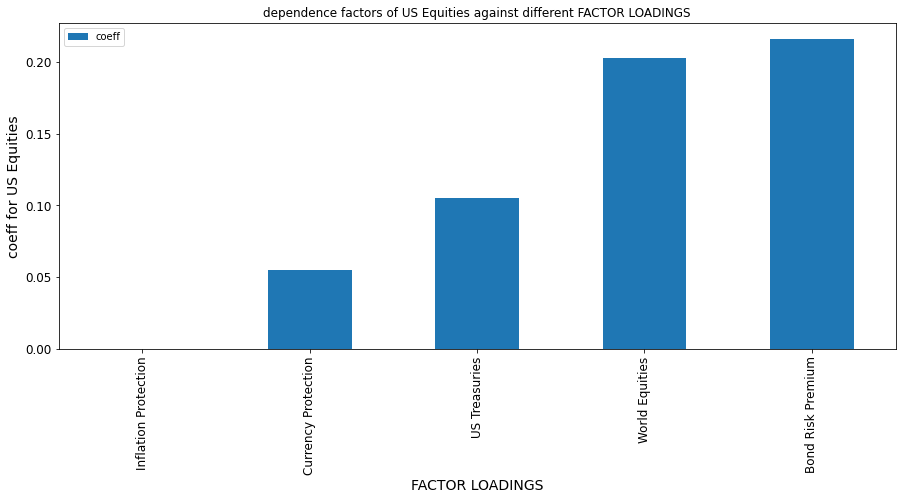

In [ ]:
df_m.plot(x='features',y='coeff',kind='bar',figsize=(15,6))
plt.title('dependence factors of US Equities against different FACTOR LOADINGS')
plt.xlabel('FACTOR LOADINGS')
plt.ylabel('coeff for US Equities')
plt.show();

In [ ]:
!jupyter nbconvert FACTOR_MODELS_ANALYSIS_PREDICTION.ipynb